![title](american-community-survey.jpg)

# American Community Survy

We will look at the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
Using scatter plots
- How many majors are predominantly male? Predominantly female?
Using histograms
- Which category of majors have the most students?
Using bar plots

## Loading the Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

Briefly checking the loaded data

In [36]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


## Cleaning the Data

This dataset looks very clean, only one column needs to be rename to make all the header names consist.

In [37]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [38]:
column_names = ['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'Share_women', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs']
recent_grads.columns = column_names

Changed the following column names in order to make the column names more readable:

- 'ShareWomen' to 'Share_women'

## Get Familiar with the Data

In [39]:
recent_grads.iloc[1,:] # Check the headers

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
Share_women                                   0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [40]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [41]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [42]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [43]:
raw_data_count = recent_grads.shape[0] # number of rows in this dataset
raw_data_count

173

In [44]:
recent_grads = recent_grads.dropna()

In [45]:
raw_data_count = recent_grads.shape[0] # number of rows in this dataset
raw_data_count

172

In [46]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


## Analyzing Data

### Salary and Employment Rate

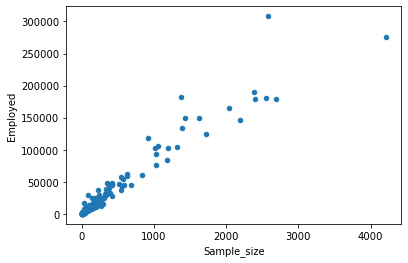

In [49]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

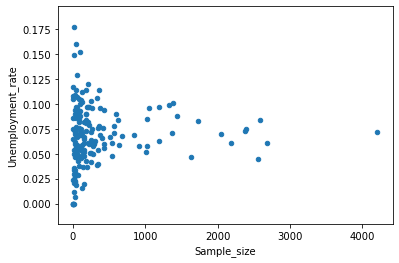

In [51]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

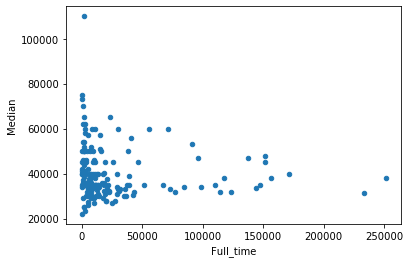

In [52]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

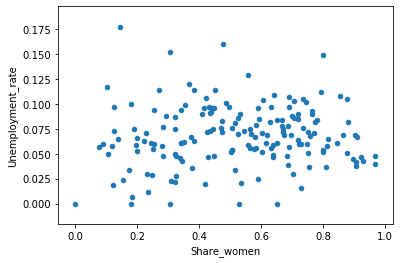

In [53]:
recent_grads.plot(x='Share_women', y='Unemployment_rate', kind='scatter')

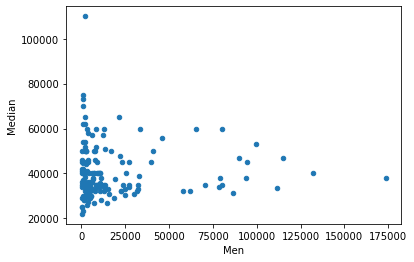

In [54]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

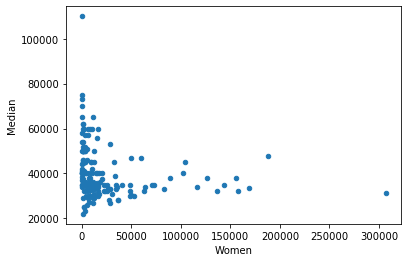

In [55]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

### Detailed Distribution of Selected Columns

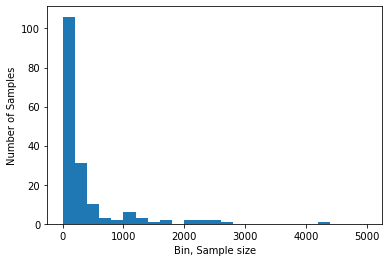

In [61]:
# Sample_size column
max(recent_grads['Sample_size'])
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
plt.xlabel('Bin, Sample size')
plt.ylabel('Number of Samples')
plt.grid(False)

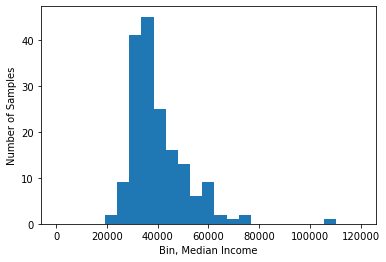

In [63]:
# Median column
max(recent_grads['Median'])
recent_grads['Median'].hist(bins=25, range=(0,120000))
plt.xlabel('Bin, Median Income')
plt.ylabel('Number of Samples')
plt.grid(False)

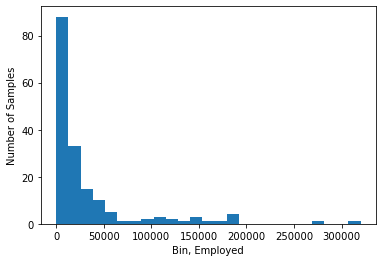

In [66]:
# Median Employed
max(recent_grads['Employed'])
recent_grads['Employed'].hist(bins=25, range=(0,320000))
plt.xlabel('Bin, Employed')
plt.ylabel('Number of Samples')
plt.grid(False)

### Major Category and Gender

In [27]:
recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Agriculture & Natural Resources         9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [28]:
major_category = recent_grads['Major_category'].value_counts().rename_axis('Major_category').reset_index(name='counts')
major_category

,Major_category,counts
0,Engineering,29
1,Education,16
2,Humanities & Liberal Arts,15
3,Biology & Life Science,14
4,Business,13
5,Health,12
6,Computers & Mathematics,11
7,Physical Sciences,10
8,Psychology & Social Work,9
9,Social Science,9


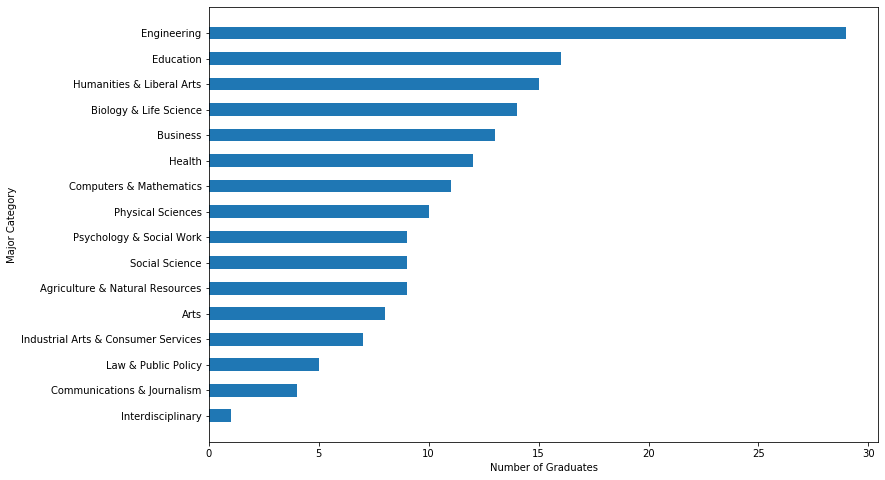

In [29]:
bar_position = np.arange(16)+1
tick_positions = range(1,17)
num_cols = list(major_category['Major_category'])

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(bar_position, major_category['counts'], 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Major Category')
ax.set_xlabel('Number of Graduates')
plt.gca().invert_yaxis()

In [30]:
groupby_mc = recent_grads.groupby('Major_category')
print(groupby_mc)

In [31]:
mc_gender_women = groupby_mc['Women'].agg(np.sum).rename_axis('Major_category').reset_index(name='Total_women')
mc_gender_men = groupby_mc['Men'].agg(np.sum).rename_axis('Major_category').reset_index(name='Total_men')
mc_gender = mc_gender_women.copy()
mc_gender['Total_men'] = mc_gender_men['Total_men']
mc_gender

,Major_category,Total_women,Total_men
0,Agriculture & Natural Resources,35263.0,40357.0
1,Arts,222740.0,134390.0
2,Biology & Life Science,268943.0,184919.0
3,Business,634524.0,667852.0
4,Communications & Journalism,260680.0,131921.0
5,Computers & Mathematics,90283.0,208725.0
6,Education,455603.0,103526.0
7,Engineering,129276.0,408307.0
8,Health,387713.0,75517.0
9,Humanities & Liberal Arts,440622.0,272846.0


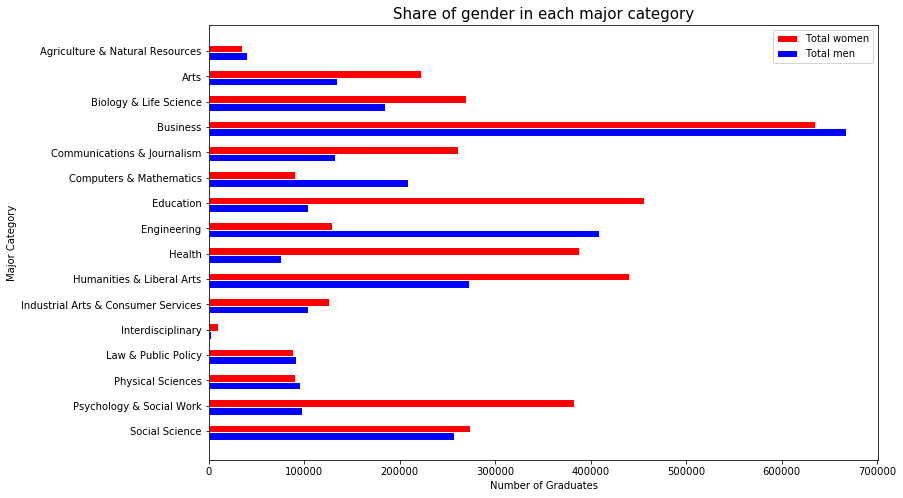

In [32]:
bar_position_women = np.arange(16)+0.9
bar_position_men = np.arange(16)+1.2
tick_positions = range(1,17)
num_cols = list(mc_gender['Major_category'])

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(bar_position_women, mc_gender['Total_women'], 0.3, color='red', edgecolor='white', label='Total women')
ax.barh(bar_position_men, mc_gender['Total_men'], 0.3, color='blue', edgecolor='white', label='Total men')
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Major Category')
ax.set_xlabel('Number of Graduates')
ax.set_title('Share of gender in each major category', fontsize=15)
plt.gca().invert_yaxis()
plt.legend()